In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set()

In [214]:
df = pd.read_csv(r"C:\Users\ljeffery\Documents\IandD\Kaggle\Untitled Folder\abalone.csv")

In [215]:
#Checking the shape of the data
df.shape

(4177, 9)

In [216]:
#Looking at the data types and count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [217]:
#summary statistics of numerical values
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [218]:
#summary statistics of non numerical values
df.describe(include=['object'])

,Sex
count,4177
unique,3
top,M
freq,1528


In [219]:
#Creating the Target Variable Age
df['Age'] = df['Rings'] + 1.5

<function matplotlib.pyplot.show(*args, **kw)>

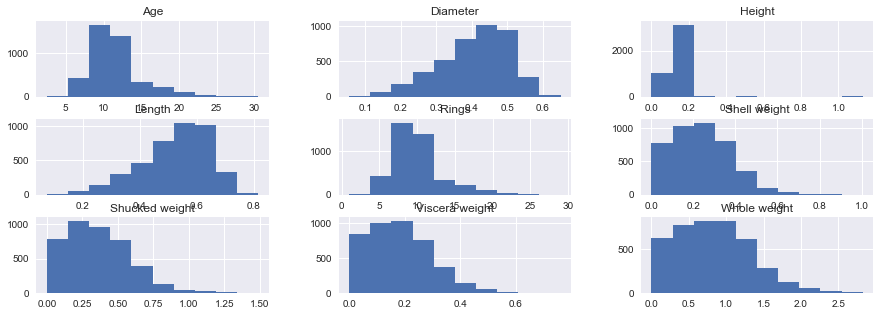

In [220]:
features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings', 'Age']
df[features].hist(figsize =(15,5))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

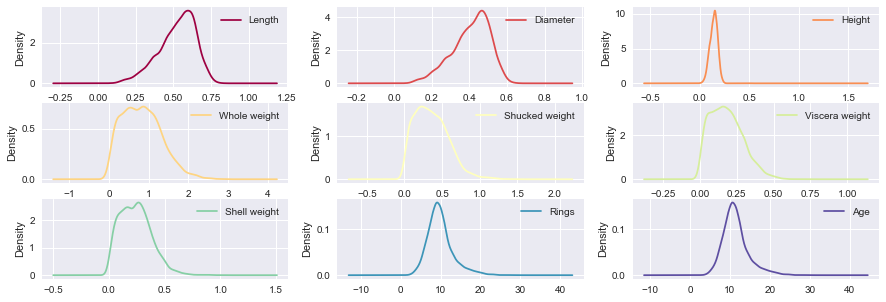

In [221]:
df[features].plot(kind='density', layout=(3,3), subplots = True, sharex=False, figsize = (15,5), cmap= 'Spectral')
plt.show

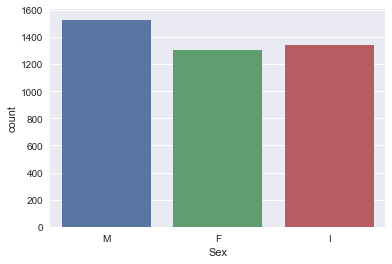

In [222]:
sns.countplot(x = 'Sex', data = df)

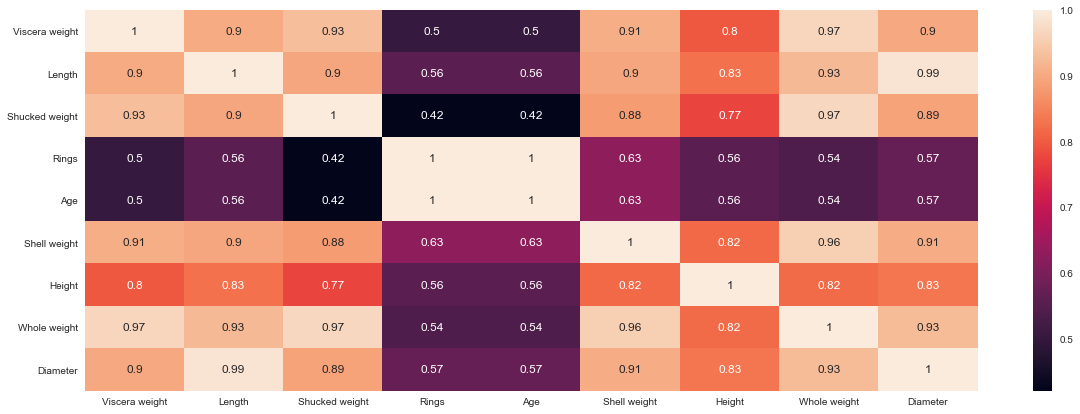

In [223]:
numerical = list(set(df.columns) - set(['Sex']))

corr_matrix = df[numerical].corr()
plt.figure(figsize=(20,7))
sns.heatmap(corr_matrix, annot=True)


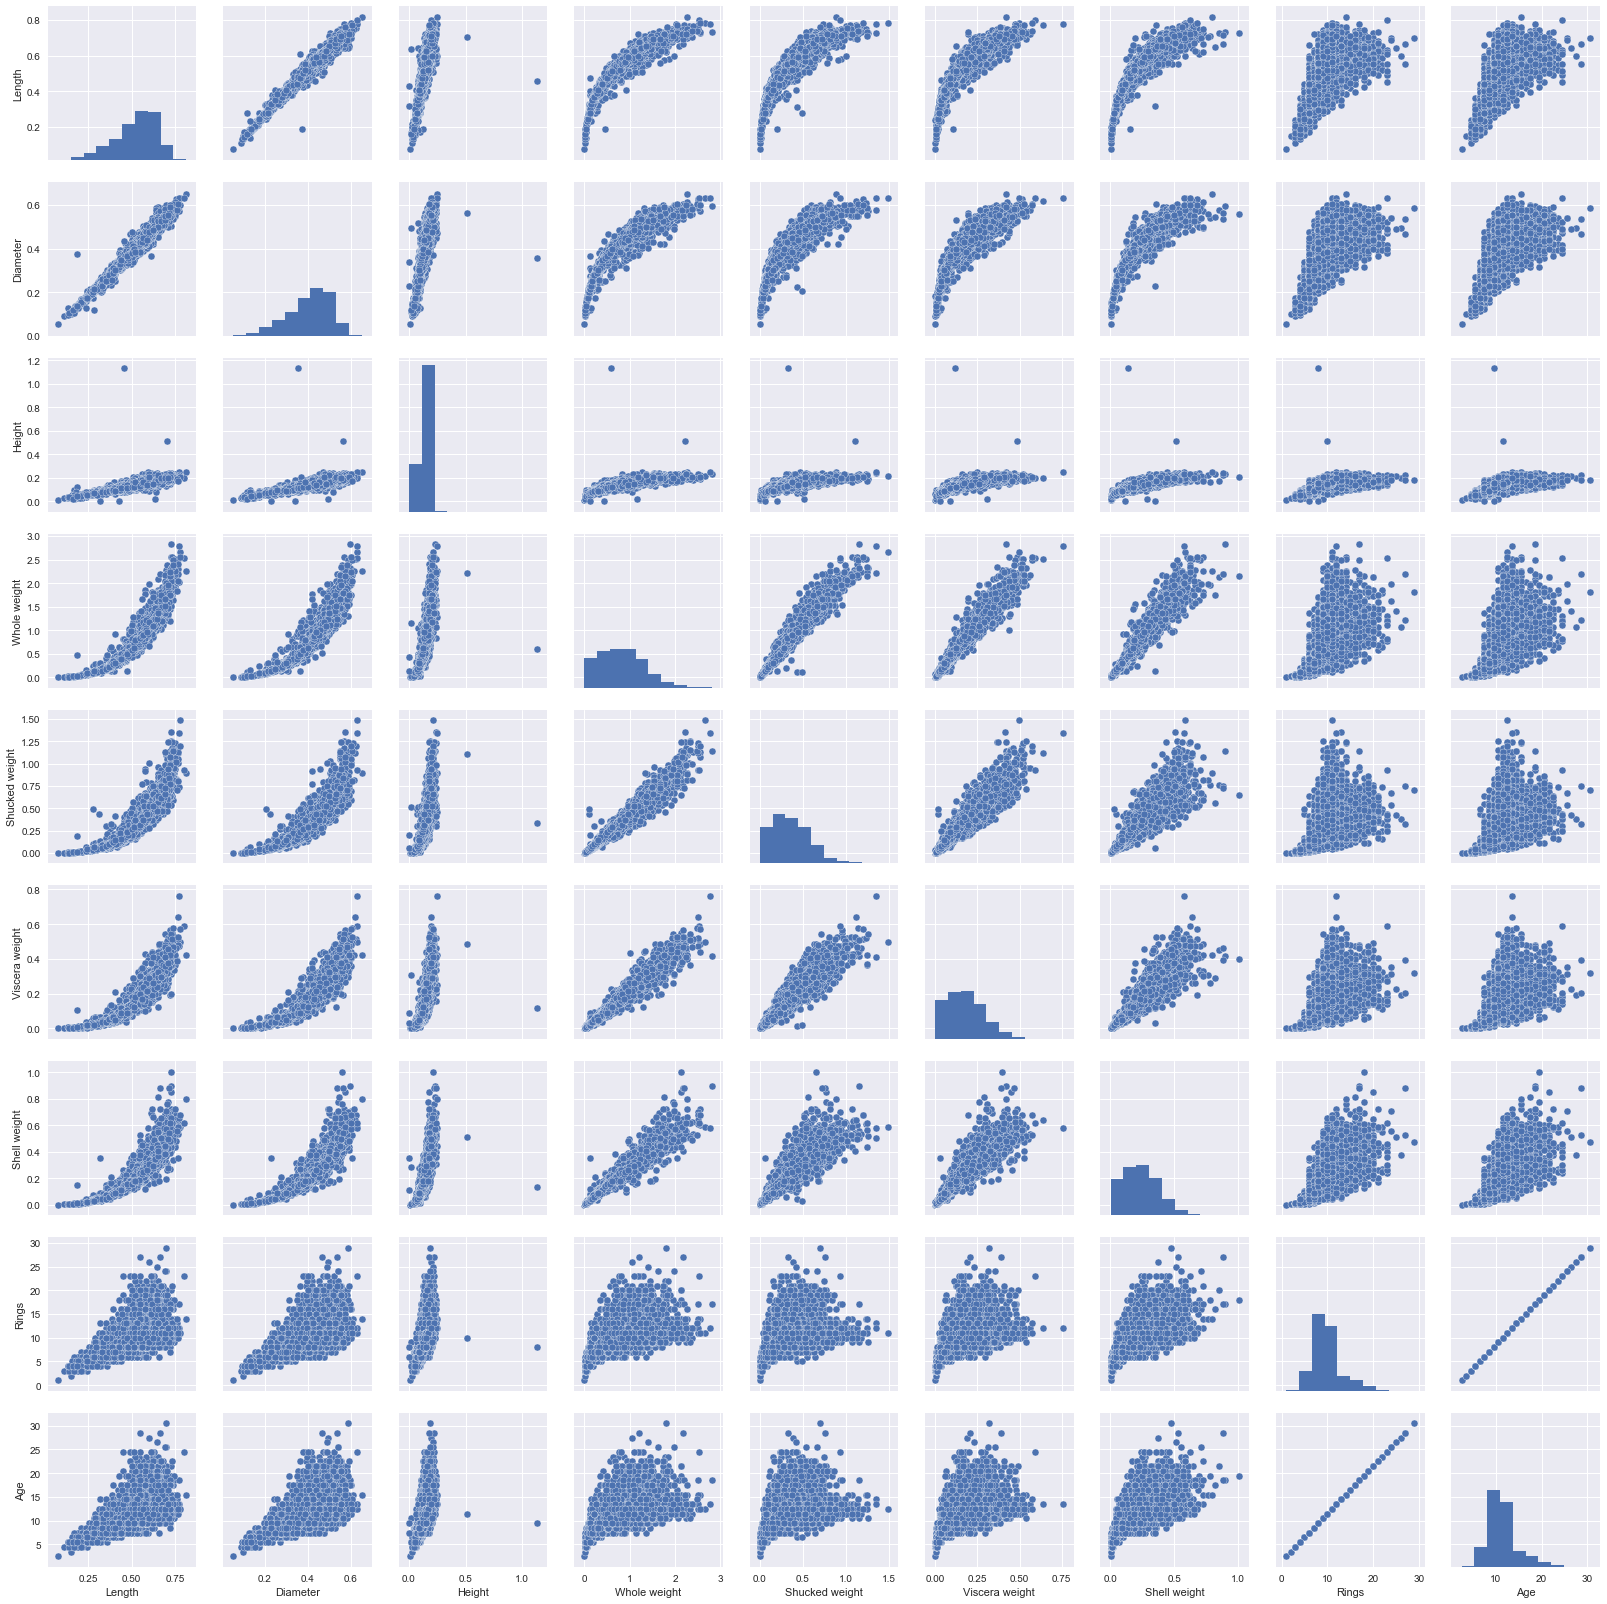

In [224]:
sns.pairplot(df)

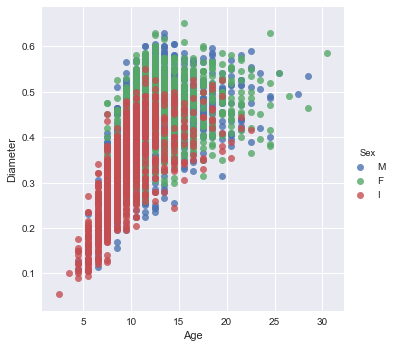

In [225]:
sns.lmplot('Age','Diameter', data = df, hue = 'Sex', fit_reg = False )

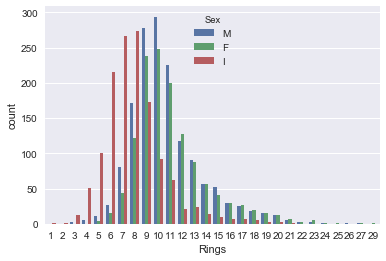

In [226]:
sns.countplot('Rings', data = df, hue = 'Sex')

(array([1.023e+03, 3.129e+03, 2.300e+01, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.   , 0.113, 0.226, 0.339, 0.452, 0.565, 0.678, 0.791, 0.904,
        1.017, 1.13 ]),
 <a list of 10 Patch objects>)

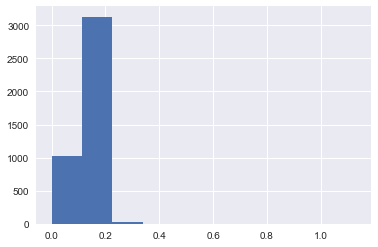

In [227]:
plt.hist('Height', data = df)

Data Engineering

In [228]:
df = pd.get_dummies(df)

In [229]:
df.drop('Rings', axis = 1, inplace = True)

In [230]:
df.sample(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_F,Sex_I,Sex_M
3025,0.495,0.330,0.100,0.4400,0.1770,0.0950,0.150,8.5,0,1,0
784,0.215,0.155,0.060,0.0525,0.0210,0.0165,0.015,6.5,0,1,0
1654,0.595,0.460,0.150,0.8335,0.3770,0.1925,0.235,9.5,0,1,0
1344,0.585,0.470,0.165,1.4090,0.8000,0.2290,0.295,11.5,0,0,1
2597,0.600,0.460,0.150,1.2350,0.6025,0.2740,0.290,9.5,1,0,0


In [231]:
#building plots to check for outliers 
def BuildPlot(x_var, y_var, title, xlabel, ylabel):
    plt.scatter(x = x_var, y = y_var)
    plt.grid(True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.figure(figsize=(12,4))

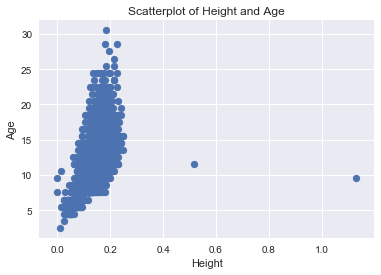

<Figure size 864x288 with 0 Axes>

In [232]:
#investigating the outliers in Height
BuildPlot(df['Height'], df['Age'], 'Scatterplot of Height and Age', 'Height', 'Age' )

In [233]:
#Removing the outliers in height
df.drop(df[(df['Height']> 0.4) & (df['Age'] < 15)].index, inplace=True)
# data.drop(data[(data['Viscera weight']<0.5) & (data['age'] > 25)].index, inplace=True)

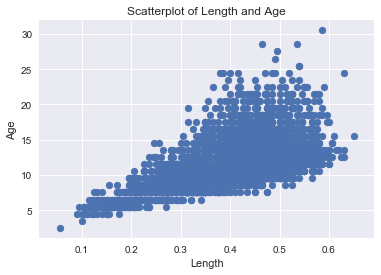

<Figure size 864x288 with 0 Axes>

In [234]:
#investigating the outliers in Length
BuildPlot(df['Diameter'], df['Age'], 'Scatterplot of Length and Age', 'Length', 'Age' )

In [235]:
print(df.isnull().sum())

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64


ML

In [251]:
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR

In [319]:
#Setting X and y 
X = df.drop(['Age'], axis = 1)
y = df['Age']

In [320]:
# Split X and y into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [321]:
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)
#predicting the y values
y_pred = lm.predict(X_test)

# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R^Squared score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ -2.79257896  10.57519363  24.33425872   8.57007433 -18.98139851
  -9.9032715    7.52394732   0.2002103   -0.47642138   0.27621108]
Mean squared error: 4.57
R^Squared score: 0.57


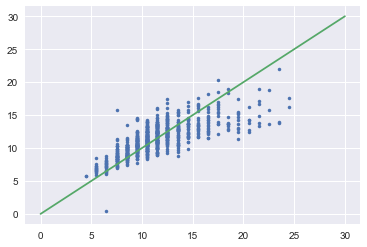

In [322]:
# plot prediction and actual data
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 30, 30)
yplot = x
plt.plot(x, yplot)
plt.show()

In [323]:
selector = SelectKBest(f_regression, k ='all')
selector.fit(X, y)
pvalues = zip(X, selector.pvalues_)

pvalue_list = sorted(pvalues, key=lambda x: x[1], reverse=False)
print ('SelectKBest pvalues: ', pvalue_list)

scores = zip(X, selector.scores_)
sorted_list = sorted(scores, key=lambda x: x[1], reverse=True)
print ('SelectKBest scores: ', sorted_list)

SelectKBest pvalues:  [('Length', 0.0), ('Diameter', 0.0), ('Height', 0.0), ('Shell weight', 0.0), ('Whole weight', 5.96488928e-316), ('Viscera weight', 3.5651046181846114e-268), ('Sex_I', 1.501437837364628e-193), ('Shucked weight', 1.8728779916248044e-179), ('Sex_F', 8.434496000200166e-61), ('Sex_M', 2.4133948138032255e-32)]
SelectKBest scores:  [('Shell weight', 2714.868795772646), ('Height', 2468.238022710083), ('Diameter', 2058.951792030745), ('Length', 1875.3214889668047), ('Whole weight', 1725.4739110623184), ('Viscera weight', 1422.724591553961), ('Sex_I', 980.7228018437189), ('Shucked weight', 901.2563281613296), ('Sex_F', 279.59136941232447), ('Sex_M', 142.59362974591312)]


In [326]:
X_New = df[['Length', 'Height', 'Diameter', 'Shell weight', 'Viscera weight']]
y = df['Age']

# Split X and y into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X_New, y, test_size=0.3, random_state=42)

# Train the model using the training sets
lm.fit(X_train, y_train)

#Predicting y
y_pred2 = lm.predict(X_test)

# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred2))
# Explained variance score: 1 is perfect prediction
print('R^squared score: %.2f' % r2_score(y_test, y_pred2))

Coefficients: 
 [ -9.53048002  33.42069978  11.39701386  16.3634503  -13.96962407]
Mean squared error: 5.41
R^squared score: 0.46


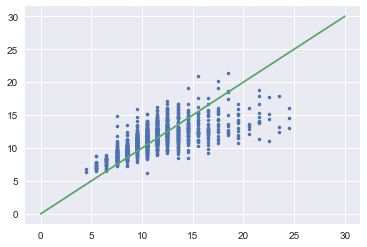

In [327]:
# plot prediction and actual data
plt.plot(y_test, y_pred2, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 30, 30)
y = x
plt.plot(x, y)
plt.show()

In [306]:
# Plot outputs
plt.scatter(X_test[:,0], y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
# plot prediction and actual data
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()


TypeError: unhashable type: 'slice'

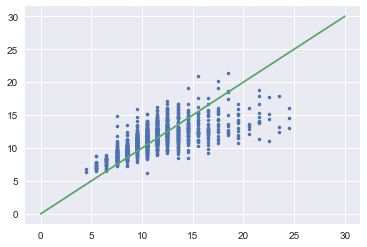

In [249]:
ridge = Ridge()

# Train the model using the training sets
lm.fit(X_train, y_train)
#predicting the y values
y_pred = lm.predict(X_test)

# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R^Squared score: %.2f' % r2_score(y_test, y_pred))

(1253,)